In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.rcParams["figure.figsize"] = (10,5)

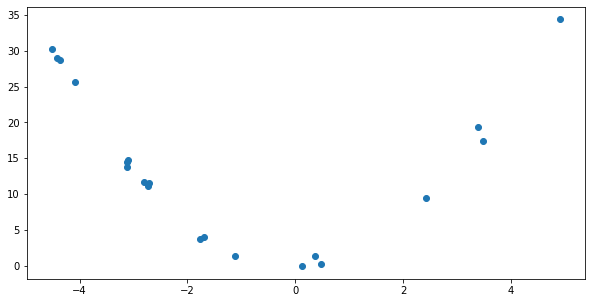

In [2]:
tmp = np.load('linear-res.npz')
x, y = list(tmp.keys())
data_raw = np.reshape(tmp[x], (1, -1))
Y = np.reshape(tmp[y], (1, -1))
plt.scatter(data_raw, Y)

In [3]:
def fit_beta(data, Y, addbias):
    n = data.shape[1]
    if addbias == True:
        X = np.vstack((np.ones(n), data))  # add a new row/dimension of 1s.
    else:
        X = data
    beta = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y.T)
    #beta = np.reshape(beta, (-1, 1))
    return beta, X

def predict(X, beta, addbias):
    if addbias == True:
        estimate_Y = beta[0] + beta[1:].T.dot(X[1:])
    else:
        estimate_Y = beta.T.dot(X)
    return estimate_Y

def residuals(Y, estimate_Y):
    residual = Y - estimate_Y
    return residual


# 1 Plotting of the Residuals

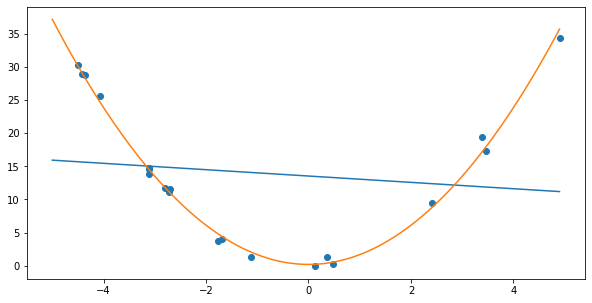

In [4]:
addbias = True
beta, X = fit_beta(data_raw, Y, addbias)
predict_Y = predict(X, beta, addbias)
residual = residuals(Y, predict_Y)

data_extend = np.vstack((data_raw, data_raw**2))
beta_extend, X_extend = fit_beta(data_extend, Y, addbias)
predict_Y_extend = predict(X_extend, beta_extend, addbias)
residual_extend = residuals(Y, predict_Y_extend)

xseq = np.arange(-5, 5, 0.1)
plt.scatter(data_raw, Y)
plt.plot(xseq, beta[0] + beta[1] * xseq)
plt.plot(xseq, beta_extend[0] + beta_extend[1] * xseq + beta_extend[2] * (xseq**2))

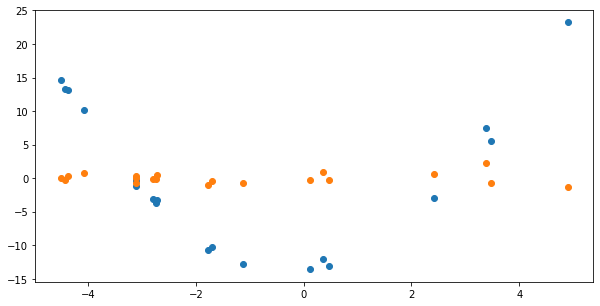

In [5]:
plt.scatter(data_raw, residual)
plt.scatter(data_raw, residual_extend)

# 2 Uncertainty in the Parameter Estimation

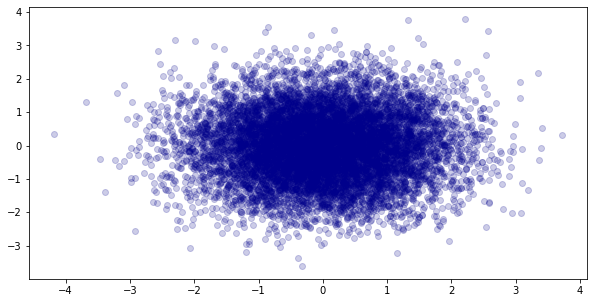

In [6]:
tmp = np.load("linear-unc1.npz")
X = tmp['X']  # 2*10000
Y = tmp['Y']  # 1*10000
plt.scatter(X[0], X[1], color='darkblue', alpha=0.2)

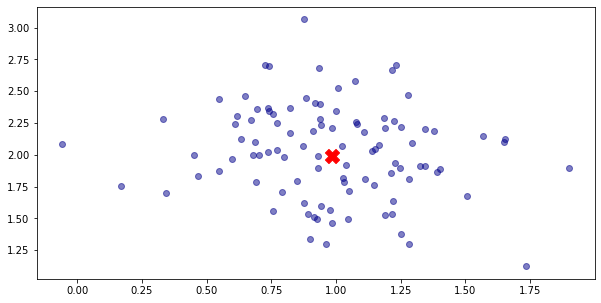

In [7]:
N = 10
K = 100
addbias = False
beta_hat, data = fit_beta(X, Y, addbias)
plt.scatter(beta_hat[0], beta_hat[1], s=200, color='red', marker='X')
for k in range(K):
    index = np.random.permutation(X.shape[1])[:N]
    sample = X[:, index]
    sample_y = Y[:, index]
    beta, sample_x = fit_beta(sample, sample_y, addbias)
    plt.scatter(beta[0], beta[1], color='darkblue', alpha=0.5)

[0.98510826 1.98897869]
[[ 9.92161368e-05 -6.63766952e-07]
 [-6.63766952e-07  1.00703242e-04]]


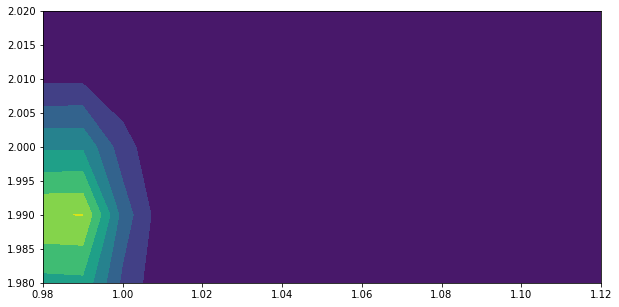

In [8]:
xseq = np.arange(0.98, 1.12, 0.01)
yseq = np.arange(1.98, 2.02, 0.01)
Xseq, Yseq = np.meshgrid(xseq, yseq)  # 800*800
pos = np.dstack((Xseq, Yseq))

mean = beta_hat.ravel()
cov = np.linalg.inv(X.dot(X.T))
print(mean)
print(cov)
Z = multivariate_normal(mean, cov)
Z = Z.pdf(pos)
plt.contourf(Xseq, Yseq, Z)

(200, 200)


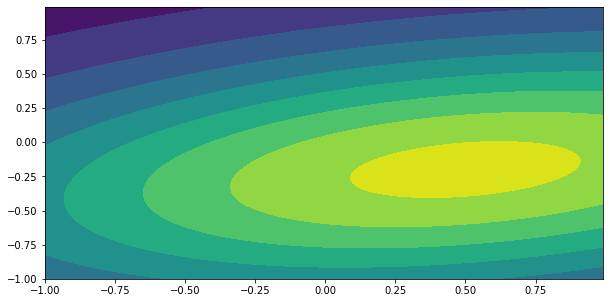

In [46]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
print(x.shape)
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])

plt.contourf(x, y, rv.pdf(pos))

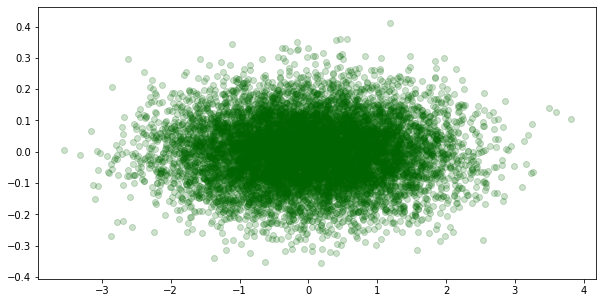

In [64]:
tmp = np.load("linear-unc2.npz")
X = tmp['X']  # 2*10000
Y = tmp['Y']  # 1*10000
plt.scatter(X[0], X[1], color='darkgreen', alpha=0.2)

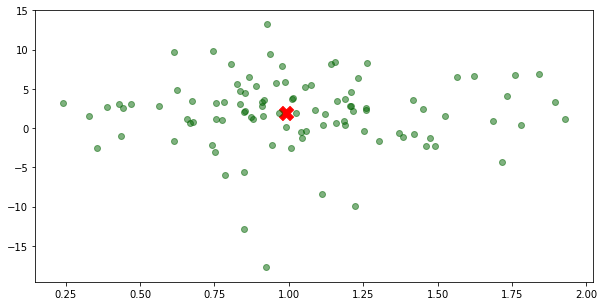

In [65]:
N = 10
K = 100
addbias = False
beta, data = fit_beta(X, Y, addbias)
plt.scatter(beta[0], beta[1], s=200, color='red', marker='X')
for k in range(K):
    index = np.random.permutation(X.shape[1])[:N]
    sample = X[:, index]
    sample_y = Y[:, index]
    beta, sample_x = fit_beta(sample, sample_y, addbias)
    plt.scatter(beta[0], beta[1], color='darkgreen', alpha=0.5)

[0.98510826 1.98897869]
[[ 1.01100631e-04 -1.10739650e-06]
 [-1.10739650e-06  9.98933947e-03]]


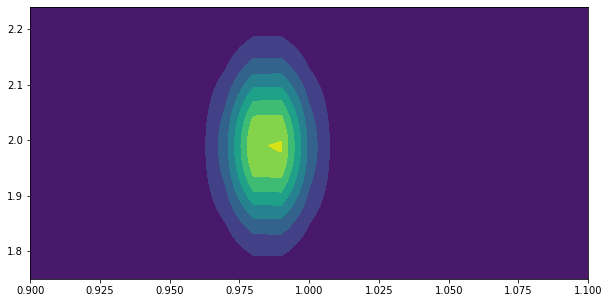

In [66]:
xseq = np.arange(0.9, 1.1, 0.01)
yseq = np.arange(1.75, 2.25, 0.01)
Xseq, Yseq = np.meshgrid(xseq, yseq)  # 800*800
pos = np.dstack((Xseq, Yseq))

mean = beta_hat.ravel()
cov = np.linalg.inv(X.dot(X.T))
print(mean)
print(cov)
Z = multivariate_normal(mean, cov)
Z = Z.pdf(pos)
plt.contourf(Xseq, Yseq, Z)

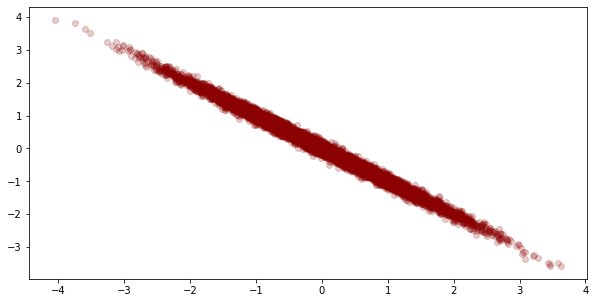

In [58]:
tmp = np.load("linear-unc3.npz")
X = tmp['X']  # 2*10000
Y = tmp['Y']  # 1*10000
plt.scatter(X[0], X[1], color='darkred', alpha=0.2)

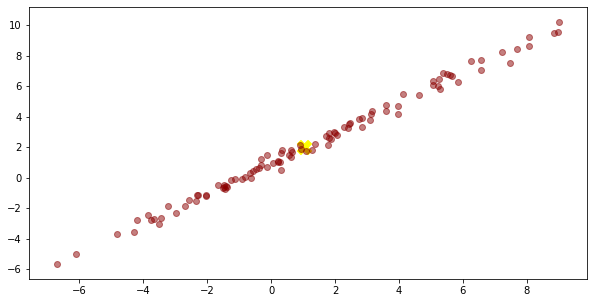

In [59]:
N = 10
K = 100
addbias = False
beta, data = fit_beta(X, Y, addbias)
plt.scatter(beta[0], beta[1], s=200, color='yellow', marker='X')
for k in range(K):
    index = np.random.permutation(X.shape[1])[:N]
    sample = X[:, index]
    sample_y = Y[:, index]
    beta, sample_x = fit_beta(sample, sample_y, addbias)
    plt.scatter(beta[0], beta[1], color='darkred', alpha=0.5)

[0.98510826 1.98897869]
[[0.0105408  0.01044083]
 [0.01044083 0.01044147]]


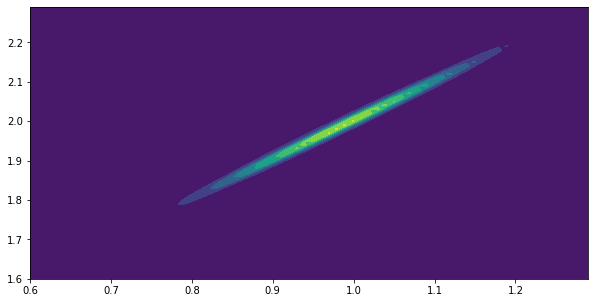

In [62]:
xseq = np.arange(0.6, 1.3, 0.01)
yseq = np.arange(1.6, 2.3, 0.01)
Xseq, Yseq = np.meshgrid(xseq, yseq)  # 800*800
pos = np.dstack((Xseq, Yseq))

mean = beta_hat.ravel()
cov = np.linalg.inv(X.dot(X.T))
print(mean)
print(cov)
Z = multivariate_normal(mean, cov)
Z = Z.pdf(pos)
plt.contourf(Xseq, Yseq, Z)